In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Read AE-1688 search results data

In [63]:
df = pd.read_excel('AE_1688_Search_Results.xlsx')

In [64]:
df.columns = ['AE','商品名称','商品链接','图片链接', '不含运费价格RMB', '重量', '运费RMB','总价USD', '卖家', '卖家城市','成交信息']

In [65]:
df =df.dropna(how='all')

In [66]:
df

,AE,商品名称,商品链接,图片链接,不含运费价格RMB,重量,运费RMB,总价USD,卖家,卖家城市,成交信息
0,Squeeze Mop Wash for Floor Mops Hand Free Magi...,可站立免手洗平拖家用木地板地砖平板拖把懒人粘布平板拖网红神器,//detail.1688.com/offer/625366806840.html,//cbu01.alicdn.com/img/ibank/2020/791/872/2315...,¥ 26.90,1000克,11.9,6.63,宁波市海曙友佳家居用品有限公司,浙江宁波市,发货速度 1.06天买家 276人成交 753件
1,https://www.aliexpress.com/item/10000154523628...,拖把家用一拖净免洗懒人新款家用大面积平板双面旋转拖布,//detail.1688.com/offer/634751769440.html,//cbu01.alicdn.com/img/ibank/O1CN014E4WWK1wigU...,¥ 25.87,--,NaN,NaN,五华县横陂镇刘少坚电子商务部,广东惠州市,发货速度 1.27天买家 435人成交 521件
2,31.32,木地板拖把家用瓷砖大面积拖地的懒人托帕吸水性强速干一拖净,//detail.1688.com/offer/640426315069.html,//cbu01.alicdn.com/img/ibank/O1CN01UB8tOH1nlaT...,¥ 11.61,300克,11.9,4.02,广州市南沙区榄核王振龙凉茶店,广东广州市,发货速度 1.74天买家 14人成交 14件
3,4.8,免手洗平板拖把家用懒人干湿吸水拖地一拖两用墩布地拖布净,//detail.1688.com/offer/641024458611.html,//cbu01.alicdn.com/img/ibank/O1CN014trrQm1du9j...,¥ 28.17,500克,11.9,6.85,河南谆勋贸易有限公司,河南郑州市,发货速度 0.75天买家 239人成交 433件
4,992 sold,免手洗平板拖把家用懒人干湿吸水拖地一拖两用墩布地拖布净,//detail.1688.com/offer/638854826360.html,//cbu01.alicdn.com/img/ibank/O1CN01WI6gHY1iJaB...,¥ 28.63,--,NaN,NaN,建德市下涯镇深悟贸易商行,广东广州市,发货速度 1.61天买家 276人成交 388件
5,NaN,工厂代发免手洗平板拖把家用懒人干湿吸水拖地神器一拖两用墩布地,//detail.1688.com/offer/640204013690.html,//cbu01.alicdn.com/img/ibank/2020/287/438/2280...,¥ 28.40,300克,11.9,6.89,滕州市玥特五金建材批发部,山东枣庄市,发货速度 1.99天买家 116人成交 120件
6,NaN,懒人拖把新款家用拖瓷砖地木地板扦把平板拖带桶套装墩布,//detail.1688.com/offer/641395187973.html,//cbu01.alicdn.com/img/ibank/O1CN01YgbUho23h2O...,¥ 17.85,--,NaN,NaN,余姚市艾洪贸易商行,浙江宁波市,发货速度 1.80天买家 371人成交 447件
7,NaN,免手洗平板拖把家用懒人干湿吸水拖地神器一拖两用墩布地拖布净,//detail.1688.com/offer/638284651786.html,//cbu01.alicdn.com/img/ibank/O1CN01ii8ESf2DmD1...,¥ 24.43,500克,11.9,6.21,广州瑟商广告传媒工作室,广东广州市,发货速度 1.64天买家 35人成交 38件
8,NaN,超强吸水拖把浴室卫生间海绵拖帕家用耐用结实吸收力超强免手洗,//detail.1688.com/offer/637845715646.html,//cbu01.alicdn.com/img/ibank/O1CN01gv0BtC25Pkf...,¥ 15.48,1000克,11.9,4.68,睢宁县金松家具厂,江苏徐州市,发货速度 2.01天买家 208人成交 237件
9,NaN,免手洗大号平板拖把家用一拖加长加宽净拖布懒人墩布拖地,//detail.1688.com/offer/636688273670.html,//cbu01.alicdn.com/img/ibank/O1CN01YJZ6g91DMYe...,¥ 29.77,--,NaN,NaN,永定区转可融网店,福建龙岩市,发货速度 1.42天买家 436人成交 597件


In [67]:
index_a = np.array([])
for i in range(len(df['AE'])):
    if isinstance(df['AE'].iloc[i],str):
        if 'http' in df['AE'].iloc[i]:
            index_a = np.append(index_a, i)

index_a =index_a.astype(int)
index_b = np.delete(index_a,0)
index_c = np.append(index_b, 29381)
interval = index_c - index_a

list1 = [df['AE'].iloc[x] for x in index_a]
# list2 = [[j for i in interval] for j in list1]
# list2

# list2 = [[list1[i] for j in range(interval[i])] for i in range(len(list1))]
list2 = []
for i in range(len(list1)):
    for j in range(interval[i]):
        list2.append(list1[i])
    
len(list2)

29380

In [68]:
index_l = []

n = 0
for i in range(len(df['AE'])):
    if isinstance(df['AE'].iloc[i],str):
        if 'http' in df['AE'].iloc[i]:
            index_l.append(i)
            n+=1

index_a = np.array(index_l)
index_b = np.delete(index_a,0)
index_c = np.append(index_b, 29381)
m=0
for i in index_c - index_a:
    if i ==20:
        m+=1
n-m

43

In [69]:
len(df)

29380

# Data Cleaning

In [70]:
def clean_price_without_shipping(p):
    if isinstance(p, float):
        p2 = 0
    elif p.split('¥\xa0')[1]=='--':
        p2 = np.nan
    else:
        p1 = p.split('¥\xa0')[1]
        p2 = float(p1)
    return p2

def clean_weight(w):
    if isinstance(w, float):
        return 0
    elif w.split('克')[0]=='--':
        return 0
    else:
        return float(w.split('克')[0])
    
def clean_sold(s):
    if isinstance(s, float):
        s2 = 0
    else:
        s1 = s.split('sold')[0]
        s2 = float(s1)
    return s2

def https(url):
    url = 'https:'+url
    return url

def split_deal(deal,n=1):
    if deal.split(' ')[1].split('天买家')[0] == '--':
        day = np.nan
    else:
        day = float(deal.split(' ')[1].split('天买家')[0])
    
    if deal.split(' ')[2].split('人成交')[0] == '--':
        buyer = np.nan
    else:
        buyer = float(deal.split(' ')[2].replace(',','').split('人成交')[0])
    
    if deal.split(' ')[3].split('件')[0] == '--':
        deal = np.nan
    else:
        deal = float(re.match(r'\d+',deal.split(' ')[3].replace(',',''))[0])
    return [day,buyer,deal]

Split 成交信息

In [71]:
day_l = [list_[0] for list_ in df['成交信息'].apply(split_deal)]
buyer_l = [list_[1] for list_ in df['成交信息'].apply(split_deal)]
item_l = [list_[2] for list_ in df['成交信息'].apply(split_deal)]
df['发货速度（天）']= day_l
df['买家数']= buyer_l
df['成交数量'] = item_l
df = df.drop(columns=['成交信息'])

Data Cleaning

In [72]:
df['商品链接'] = df['商品链接'].apply(https)
df['图片链接'] = df['图片链接'].apply(https)
df['不含运费价格RMB'] = df['不含运费价格RMB'].apply(clean_price_without_shipping)
df['重量'] = df['重量'].apply(clean_weight)

In [73]:
df

,AE,商品名称,商品链接,图片链接,不含运费价格RMB,重量,运费RMB,总价USD,卖家,卖家城市,发货速度（天）,买家数,成交数量
0,Squeeze Mop Wash for Floor Mops Hand Free Magi...,可站立免手洗平拖家用木地板地砖平板拖把懒人粘布平板拖网红神器,https://detail.1688.com/offer/625366806840.html,https://cbu01.alicdn.com/img/ibank/2020/791/87...,26.90,1000.0,11.9,6.63,宁波市海曙友佳家居用品有限公司,浙江宁波市,1.06,276.0,753.0
1,https://www.aliexpress.com/item/10000154523628...,拖把家用一拖净免洗懒人新款家用大面积平板双面旋转拖布,https://detail.1688.com/offer/634751769440.html,https://cbu01.alicdn.com/img/ibank/O1CN014E4WW...,25.87,0.0,NaN,NaN,五华县横陂镇刘少坚电子商务部,广东惠州市,1.27,435.0,521.0
2,31.32,木地板拖把家用瓷砖大面积拖地的懒人托帕吸水性强速干一拖净,https://detail.1688.com/offer/640426315069.html,https://cbu01.alicdn.com/img/ibank/O1CN01UB8tO...,11.61,300.0,11.9,4.02,广州市南沙区榄核王振龙凉茶店,广东广州市,1.74,14.0,14.0
3,4.8,免手洗平板拖把家用懒人干湿吸水拖地一拖两用墩布地拖布净,https://detail.1688.com/offer/641024458611.html,https://cbu01.alicdn.com/img/ibank/O1CN014trrQ...,28.17,500.0,11.9,6.85,河南谆勋贸易有限公司,河南郑州市,0.75,239.0,433.0
4,992 sold,免手洗平板拖把家用懒人干湿吸水拖地一拖两用墩布地拖布净,https://detail.1688.com/offer/638854826360.html,https://cbu01.alicdn.com/img/ibank/O1CN01WI6gH...,28.63,0.0,NaN,NaN,建德市下涯镇深悟贸易商行,广东广州市,1.61,276.0,388.0
5,NaN,工厂代发免手洗平板拖把家用懒人干湿吸水拖地神器一拖两用墩布地,https://detail.1688.com/offer/640204013690.html,https://cbu01.alicdn.com/img/ibank/2020/287/43...,28.40,300.0,11.9,6.89,滕州市玥特五金建材批发部,山东枣庄市,1.99,116.0,120.0
6,NaN,懒人拖把新款家用拖瓷砖地木地板扦把平板拖带桶套装墩布,https://detail.1688.com/offer/641395187973.html,https://cbu01.alicdn.com/img/ibank/O1CN01YgbUh...,17.85,0.0,NaN,NaN,余姚市艾洪贸易商行,浙江宁波市,1.80,371.0,447.0
7,NaN,免手洗平板拖把家用懒人干湿吸水拖地神器一拖两用墩布地拖布净,https://detail.1688.com/offer/638284651786.html,https://cbu01.alicdn.com/img/ibank/O1CN01ii8ES...,24.43,500.0,11.9,6.21,广州瑟商广告传媒工作室,广东广州市,1.64,35.0,38.0
8,NaN,超强吸水拖把浴室卫生间海绵拖帕家用耐用结实吸收力超强免手洗,https://detail.1688.com/offer/637845715646.html,https://cbu01.alicdn.com/img/ibank/O1CN01gv0Bt...,15.48,1000.0,11.9,4.68,睢宁县金松家具厂,江苏徐州市,2.01,208.0,237.0
9,NaN,免手洗大号平板拖把家用一拖加长加宽净拖布懒人墩布拖地,https://detail.1688.com/offer/636688273670.html,https://cbu01.alicdn.com/img/ibank/O1CN01YJZ6g...,29.77,0.0,NaN,NaN,永定区转可融网店,福建龙岩市,1.42,436.0,597.0


不含运费价格USD

In [74]:
ex_rate = 0.1561
df['不含运费价格USD'] = df['不含运费价格RMB']*ex_rate

## Broadcast AE data to all 1688 rows 

In [75]:
def flatten(list_):
    new_list = []
    for item in list_:
        # Look at each item in iterable. 
        if isinstance(item, list):  
            # If the item is a list, then flatten that list
#             print('passed IN', item)
            flattened_inner_list = flatten(item)
#             print('handed OUT', flattened_inner_list)
            new_list.extend(flattened_inner_list)
        else:
            # If the item is not a list, just append it to the growing flat list that will be returned.
            new_list.append(item)  # base case
    return new_list

def cre_col(df,col):
    index_a = np.array([])
    for i in range(len(df['AE'])):
        if isinstance(df['AE'].iloc[i],str):
            if 'http' in df['AE'].iloc[i]:
                index_a = np.append(index_a, i)

    index_a =index_a.astype(int)
    index_b = np.delete(index_a,0)
    index_c = np.append(index_b, 29381)
    interval = index_c - index_a
    if col == 'AE name':
        pos = -1
    else:
        col_l = ['AE url', 'AE price', 'AE ratings', 'AE sold']
        pos = col_l.index(col)
    
    # get all effective values reffering to col
    list1 = [df['AE'].iloc[x+pos] for x in index_a]
    # repeat all values for INTERVAL times 
    list2 = []
    for i in range(len(list1)):
        for j in range(interval[i]):
                list2.append(list1[i])
    
    # repeat all values for 20 times 
#     list2 = [[j for i in interval] for j in list1]
    # flattern the list
#     list3 = flatten(list2)
    
    return list2

In [76]:
len(cre_col(df,'AE name'))

29380

In [77]:
#create new cols
for col in ['AE name', 'AE url', 'AE price', 'AE ratings', 'AE sold']:
    df[col]=cre_col(df,col)

In [78]:
len(df['AE name'].unique())

1224

In [79]:
#delete the 1st column from left
df = df.drop(columns=['AE'])

In [80]:
df['AE sold'] = df['AE sold'].apply(clean_sold)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29380 entries, 0 to 30800
Data columns (total 18 columns):
商品名称          29380 non-null object
商品链接          29380 non-null object
图片链接          29380 non-null object
不含运费价格RMB     29375 non-null float64
重量            29380 non-null float64
运费RMB         24178 non-null float64
总价USD         24385 non-null float64
卖家            29380 non-null object
卖家城市          29380 non-null object
发货速度（天）       29123 non-null float64
买家数           29380 non-null float64
成交数量          29380 non-null float64
不含运费价格USD     29375 non-null float64
AE name       29380 non-null object
AE url        29380 non-null object
AE price      29380 non-null float64
AE ratings    25720 non-null float64
AE sold       29380 non-null float64
dtypes: float64(11), object(7)
memory usage: 4.3+ MB


Calculating the ratios

In [82]:
df['不含运费/AE'] = df['不含运费价格USD']/df['AE price']
df['总价/AE'] = df['总价USD']/df['AE price']
df['不含运费价利润率'] = 1-df['不含运费/AE']
df['总价利润率'] = 1- df['总价/AE']

Distribution of margin

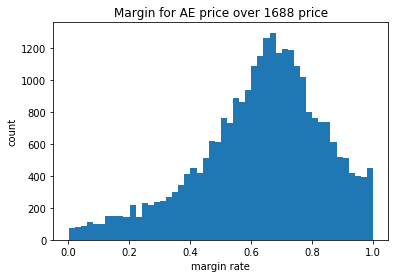

In [83]:
plt.hist(1-df[df['不含运费/AE']<1]['不含运费/AE'],bins=50)
plt.title('Margin for AE price over 1688 price')
plt.xlabel('margin rate')
plt.ylabel('count')
plt.show()

In [30]:
len(df[df['总价/AE']<=1])

21865

In [31]:
len(df['AE name'].unique())

1224

In [86]:
print(len(df[df['总价/AE']<0.5]))
print(len(df[df['总价/AE']<0.5])/len(df))

11308
0.38488767869298846


In [32]:
len(df.dropna(how='any')['AE name'].unique())

1039

In [85]:
# df.to_excel('1688 vs AE-0607.xlsx')

# Matching Keywords

In [34]:
kw = pd.read_excel('行业线AE关键词06022237.xlsx')

In [35]:
df['AE name'].iloc[0]

'Squeeze Mop Wash for Floor Mops Hand Free Magic House Cleaning Cleaner Lazy wet Home help Wonderlife_aliexpress Lightning Offers'

In [36]:
name = 'Squeeze Mop Wash for Floor Mops Hand Free Magic House Cleaning Cleaner Lazy wet Home help Wonderlife_aliexpress Lightning Offers'
kw.loc[kw['标题'] == name]['关键词'].values[0]

'shopify hot'

In [37]:
def search_keywords(name):
    keyword = kw.loc[kw['标题'] == name]['关键词'].values[0]
    return keyword

In [38]:
df['keywords'] = df['AE name'].apply(search_keywords)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29380 entries, 0 to 30800
Data columns (total 23 columns):
商品名称          29380 non-null object
商品链接          29380 non-null object
图片链接          29380 non-null object
不含运费价格RMB     29375 non-null float64
重量            29380 non-null float64
运费RMB         24178 non-null float64
总价USD         24385 non-null float64
卖家            29380 non-null object
卖家城市          29380 non-null object
发货速度（天）       29123 non-null float64
买家数           29380 non-null float64
成交数量          29380 non-null float64
不含运费价格USD     29375 non-null float64
AE name       29380 non-null object
AE url        29380 non-null object
AE price      29380 non-null float64
AE ratings    25720 non-null float64
AE sold       29380 non-null float64
不含运费/AE       29375 non-null float64
总价/AE         24385 non-null float64
不含运费价利润率      29375 non-null float64
总价利润率         24385 non-null float64
keywords      29380 non-null object
dtypes: float64(15), object(8)
memory usage: 5.4

In [147]:
# df.to_excel('1688 vs AE-keywords0607.xlsx')

In [163]:
# df[:5000].to_excel('1688 v AE_0-4999.xlsx')
# df[5000:10000].to_excel('1688 v AE_5000-9999.xlsx')
# df[10000:15000].to_excel('1688 v AE_10000-14999.xlsx')
# df[15000:20000].to_excel('1688 v AE_15000-19999.xlsx')
# df[20000:25000].to_excel('1688 v AE_20000-24999.xlsx')
# df[25000:].to_excel('1688 v AE_25000-29380.xlsx')

# Normalization & Weighting

read AE-1688-SP data

In [88]:
df2 = pd.read_excel('1-AE-1688 hot Sale.xlsx',header=1)
df2 = df2.set_index('Unnamed: 0')

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29320 entries, 2274 to 1578
Data columns (total 28 columns):
AE 商品名                   28460 non-null object
AE 链接地址                  28460 non-null object
AE价格                     28460 non-null float64
AE成交量                    29320 non-null int64
总价利润率                    23601 non-null float64
AE 评分                    24860 non-null float64
14days_sale_grow_rate    29320 non-null object
热销指数                     29320 non-null float64
商品名称                     29320 non-null object
商品链接                     29320 non-null object
图片链接                     29320 non-null object
不含运费价格RMB                29315 non-null float64
不含运费价格USD                29315 non-null float64
重量（g）                    29320 non-null float64
运费RMB                    24124 non-null float64
总价USD                    24331 non-null float64
卖家                       29320 non-null object
卖家城市                     29320 non-null object
成交信息                     29320 non-

In [90]:
day_l = [list_[0] for list_ in df2['成交信息'].apply(split_deal)]
buyer_l = [list_[1] for list_ in df2['成交信息'].apply(split_deal)]
item_l = [list_[2] for list_ in df2['成交信息'].apply(split_deal)]
df2['发货速度（天）']= day_l
df2['买家数']= buyer_l
df2['成交数量'] = item_l
df2 = df2.drop(columns=['成交信息'])

In [91]:
df2

,AE 商品名,AE 链接地址,AE价格,AE成交量,总价利润率,AE 评分,14days_sale_grow_rate,热销指数,商品名称,商品链接,...,不含运费价利润率,today_sale,3_days_sale,7days_sale_grow_rate,7days_sale,14days_sale,30天关键词增长率,发货速度（天）,买家数,成交数量
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2274,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.708478,5.0,+274%,22.686305,2021欧美外贸爆款女装独立站 不规则撕烂破洞弹力牛仔热裤短裤女,//detail.1688.com/offer/644998374989.html,...,0.894673,2,10,+9%,37,71,89,1.72,507.0,2435.0
2265,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.698097,5.0,+274%,22.683700,2021夏季外贸新款欧美跨境性感高腰割破镂空纽扣牛仔热裤外贸批发,//detail.1688.com/offer/638952800640.html,...,0.885221,2,10,+9%,37,71,89,1.17,170.0,227.0
2261,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.602076,5.0,+274%,22.659605,跨境货源2021夏季新款牛仔短裤,//detail.1688.com/offer/644030481578.html,...,0.797448,2,10,+9%,37,71,89,2.06,242.0,1291.0
2278,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.483564,5.0,+274%,22.629866,2019年宽松大码休闲短裤女破洞牛仔短裤修身蕾丝拼接潮女士短裤,//detail.1688.com/offer/45128812743.html,...,0.689420,2,10,+9%,37,71,"+8,900%",0.87,258.0,2947.0
2260,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.454152,5.0,+274%,22.622485,速卖通亚马逊 wish 独立站新款 ins网红破洞牛仔裤女 短裤,//detail.1688.com/offer/641431625488.html,...,0.662413,2,10,+9%,37,71,"+8,900%",1.41,1013.0,7308.0
2262,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.454152,5.0,+274%,22.622485,跨境货源 wish 独立站新款 ins网红破洞牛仔短裤,//detail.1688.com/offer/643563593624.html,...,0.662413,2,10,+9%,37,71,"+8,900%",1.28,129.0,484.0
2263,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.454152,5.0,+274%,22.622485,速卖通亚马逊 wish 独立站新款 磨破破洞弹力牛仔短裤,//detail.1688.com/offer/644591093580.html,...,0.662413,2,10,+9%,37,71,"+8,900%",1.41,1013.0,7308.0
2276,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.424740,5.0,+274%,22.615104,速卖通亚马逊 wish 独立站新款 磨破 弹力牛仔裤 女 破洞牛仔短裤,//detail.1688.com/offer/645584938950.html,...,0.635407,2,10,+9%,37,71,"+8,900%",1.41,1013.0,7308.0
2277,Fashion Sexy High Waist Ladies Denim Shorts 20...,https://www.aliexpress.com/item/10050024391463...,11.56,85,0.410035,5.0,+274%,22.611414,亚马逊wish厂家直销牛仔裤女破洞女士牛仔短裤女大码毛边热裤夏,//detail.1688.com/offer/613851952818.html,...,0.621903,2,10,+9%,37,71,"+8,900%",2.03,267.0,1085.0


In [92]:
def clean_growth(g):
    if isinstance(g, int):
        return g
    else:
        g = g.replace(',','')
        if '+' in g:
            growth=int(g.split('+')[1].split('%')[0])/100
        elif '-' in g:
            growth=int(g.split('-')[1].split('%')[0])/100
        else:
            growth=int(g.split('%')[0])/100
        return growth
df2['14days_sale_grow_rate'] = df2['14days_sale_grow_rate'].apply(clean_growth)

In [94]:
from sklearn import preprocessing

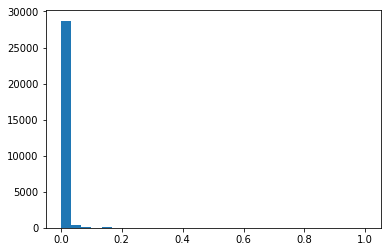

In [95]:
b = preprocessing.minmax_scale(df2['成交数量'],feature_range=(0, 1), axis=0, copy=True)
plt.hist(b,bins=30)
plt.show()

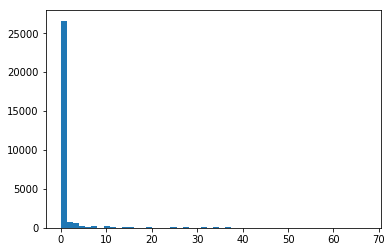

In [96]:
plt.hist(df2['3_days_sale'],bins=50)
plt.show()

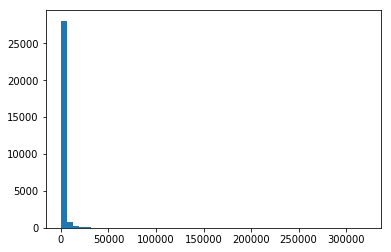

In [97]:
plt.hist(df2['成交数量'],bins=50)
plt.show()

1.0


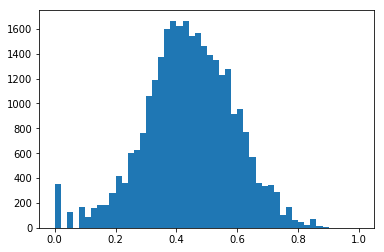

In [98]:
x = np.log(df2['成交数量']-min(df2['成交数量'])+1)/np.log(max(df2['成交数量'])-min(df2['成交数量'])+1)
print(max(x))
plt.hist(x,bins=50)
plt.show()

In [99]:
# Normalization 
df2['总价利润率_norm'] = (df2['总价利润率']-min(df2['总价利润率']))/(max(df2['总价利润率'])-min(df2['总价利润率']))
df2['成交数量_norm'] = np.log(df2['成交数量']-min(df2['成交数量'])+1)/np.log(max(df2['成交数量'])-min(df2['成交数量'])+1)
df2['AE成交量_norm'] = np.log(df2['AE成交量']-min(df2['AE成交量'])+1)/np.log(max(df2['AE成交量'])-min(df2['AE成交量'])+1)
df2['AE 评分_norm'] = (df2['AE 评分']-min(df2['AE 评分']))/(max(df2['AE 评分'])-min(df2['AE 评分']))
df2['14days_sale_grow_rate_norm'] = (df2['14days_sale_grow_rate']-min(df2['14days_sale_grow_rate']))/(max(df2['14days_sale_grow_rate'])-min(df2['14days_sale_grow_rate']))

In [100]:
#Checking data integrity
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29320 entries, 2274 to 1578
Data columns (total 35 columns):
AE 商品名                        28460 non-null object
AE 链接地址                       28460 non-null object
AE价格                          28460 non-null float64
AE成交量                         29320 non-null int64
总价利润率                         23601 non-null float64
AE 评分                         24860 non-null float64
14days_sale_grow_rate         29320 non-null float64
热销指数                          29320 non-null float64
商品名称                          29320 non-null object
商品链接                          29320 non-null object
图片链接                          29320 non-null object
不含运费价格RMB                     29315 non-null float64
不含运费价格USD                     29315 non-null float64
重量（g）                         29320 non-null float64
运费RMB                         24124 non-null float64
总价USD                         24331 non-null float64
卖家                            29320 non-null obj

In [102]:
df2['总价利润率_norm'] = df2['总价利润率_norm'].replace(np.nan, 0)
df2['AE 评分_norm'] = df2['AE 评分_norm'].replace(np.nan, 0)
# Calculating JD score
df2['JD score'] = df2['总价利润率_norm']*0.35 + df2['成交数量_norm']*0.2 + df2['AE成交量_norm']*0.2 + df2['AE 评分_norm']*0.2 + df2['14days_sale_grow_rate_norm']*0.05

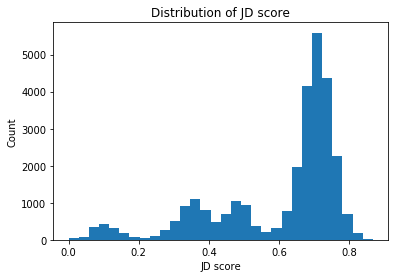

In [103]:
#JD score Dist
plt.hist(df2['JD score'],bins=30)
plt.title('Distribution of JD score')
plt.xlabel('JD score')
plt.ylabel('Count')
plt.show()

In [104]:
#Group by AE url and sort values by JD score WITHIN each group
df3 = df2.groupby('AE 链接地址').apply(lambda x: x.sort_values('JD score', ascending=False))
df3

AE 商品名  \
AE 链接地址                                            Unnamed: 0                                                      
https://www.aliexpress.com/item/10000014260867.... 15025       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15033       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15028       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15027       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15036       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15026       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15024       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15023       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15034       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15037       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15021       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15029       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15030       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15031       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15032       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15022       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15035       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15020       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15038       (Have eyes)Summer Men Women Short Sleeve POLO ...   
                                                   15039       (Have eyes)Summer Men Women Short Sleeve POLO ...   
https://www.aliexpress.com/item/10000035484831.... 7472        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7462        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7464        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7467        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7473        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7468        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7466        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7479        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7471        Men Running T Shirt Outdoor Quick Dry Breathab...   
                                                   7477        Men Running T Shirt Outdoor Quick Dry Breathab...   
...                                                                                                          ...   
https://www.aliexpress.com/item/4001364760587.h... 3606        3D Magnetic Levitating Moon Lamp Night Light 1...   
                                                   3617        3D Magnetic Levitating Moon Lamp Night Light 1...   
                                              

In [237]:
# df2.groupby('AE 链接地址').apply(lambda x: x.sort_values('JD score', ascending=False)).to_excel('1688-AE recommendation.xlsx')

In [238]:
len(df2['AE 链接地址'].unique())

1382

In [254]:
# df2.sort_values(['JD score', 'AE 链接地址'],ascending=False).to_excel('1688-AE recommend0608.xlsx')

In [105]:
#Sort values by JD score and then by AE url
df2.sort_values(['JD score', 'AE 链接地址'],ascending=False)

,AE 商品名,AE 链接地址,AE价格,AE成交量,总价利润率,AE 评分,14days_sale_grow_rate,热销指数,商品名称,商品链接,...,30天关键词增长率,发货速度（天）,买家数,成交数量,总价利润率_norm,成交数量_norm,AE成交量_norm,AE 评分_norm,14days_sale_grow_rate_norm,JD score
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
6721,Sexy Women Multiway Wrap Convertible Boho Maxi...,https://www.aliexpress.com/item/32888525125.ht...,12.98,6486,0.448382,4.8,0.00,0.608405,Ebay速卖通欧美爆款多穿法交叉露背性感绷带连衣裙长裙礼服,//detail.1688.com/offer/557951678802.html,...,0%,1.33,567.0,3154.0,0.999124,0.635558,1.000000,0.950,0.000000,0.866805
24780,"Men's Outdoor Tactical Hiking T-Shirts,Militar...",https://www.aliexpress.com/item/10050013456873...,22.59,2981,0.569278,4.6,0.00,0.498004,蛙服长袖T恤 套服上衣迷彩长袖 军训长袖T恤PLY-11,//detail.1688.com/offer/576149573119.html,...,0,0.80,634.0,9083.0,0.999318,0.718981,0.911455,0.900,0.000000,0.855848
24796,"Men's Outdoor Tactical Hiking T-Shirts,Militar...",https://www.aliexpress.com/item/10050013456873...,22.59,2981,0.569278,4.6,0.00,0.498004,青蛙服长袖蛙服套装上衣迷彩野战套服外套训练服PLY-11,//detail.1688.com/offer/572966492667.html,...,0,0.80,634.0,9083.0,0.999318,0.718981,0.911455,0.900,0.000000,0.855848
6739,Sexy Women Multiway Wrap Convertible Boho Maxi...,https://www.aliexpress.com/item/32888525125.ht...,12.98,6486,0.500770,4.8,0.00,0.621551,工厂直销2021夏季欧美女装wish热卖连衣裙饶绳子挂脖多穿法小礼服,//detail.1688.com/offer/628993238064.html,...,0%,0.95,343.0,1274.0,0.999208,0.564085,1.000000,0.950,0.000000,0.852540
6222,Ymwmhu Fashion Slim Men Polo Shirt Black Short...,https://www.aliexpress.com/item/4001155826463....,11.47,678,0.449869,4.6,0.14,0.466726,男式t恤男短袖翻领polo衫商务休闲男装中年条纹夏季新款半袖体恤,//detail.1688.com/offer/644616654950.html,...,+37%,0.78,539.0,48642.0,0.999127,0.851350,0.742874,0.900,0.002295,0.848654
6182,Ymwmhu Fashion Slim Men Polo Shirt Black Short...,https://www.aliexpress.com/item/4001155826463....,11.47,678,0.449869,4.6,0.14,0.466726,男式t恤男短袖翻领polo衫商务休闲男装中年条纹夏季新款半袖体恤,//detail.1688.com/offer/644616654950.html,...,+37%,0.78,539.0,48642.0,0.999127,0.851350,0.742874,0.900,0.002295,0.848654
6202,Ymwmhu Fashion Slim Men Polo Shirt Black Short...,https://www.aliexpress.com/item/4001155826463....,11.47,678,0.449869,4.6,0.14,0.466726,男式t恤男短袖翻领polo衫商务休闲男装中年条纹夏季新款半袖体恤,//detail.1688.com/offer/644616654950.html,...,+37%,0.78,539.0,48642.0,0.999127,0.851350,0.742874,0.900,0.002295,0.848654
6738,Sexy Women Multiway Wrap Convertible Boho Maxi...,https://www.aliexpress.com/item/32888525125.ht...,12.98,6486,0.580123,4.8,0.00,0.641464,跨境货源欧美2021夏热卖女装连衣裙饶绳子挂脖多穿法女装 小礼服,//detail.1688.com/offer/625876417369.html,...,0%,1.25,168.0,992.0,0.999335,0.544366,1.000000,0.950,0.000000,0.848640
2972,XITAO Plus Size Dress Fashion New High Waist E...,https://www.aliexpress.com/item/4001140301070....,22.40,808,0.558929,4.9,0.49,0.414063,年后发9653原创传统汉服日常改良绣花交领比甲襦裙三件套春款,//detail.1688.com/offer/603047773559.html,...,-5%,1.19,686.0,13875.0,0.999301,0.752400,0.762832,0.975,0.008033,0.848203
